### Importing packages:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import math
import os,shutil
import glob
# from google.colab import drive # uncomment when using google colab

In [2]:
tf.config.list_physical_devices('GPU') # access to personal GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Mounting google drive:

In [3]:
os.getcwd() # getting working directory

'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/Python/Portfolio/Image_Caption_Classification'

In [28]:
### Finding directory for image directory
image_dir = os.path.abspath(sel_images[0])
image_dir = image_dir[:-10]

In [29]:
for root, dirs, files in os.walk(image_dir):
    print(files)

['.DS_Store', 'captions.json', 'Image_Caption_Assignment.ipynb']
['3401902253_cd27e6d0fe.jpg', '2599444370_9e40103027.jpg', '485566887_57eac33bd1.jpg', '3298233193_d2a550840d.jpg', '3467510271_0f57e52768.jpg', '3255482333_5bcee79f7e.jpg', '2982881046_45765ced2c.jpg', '1227655020_b11a1bb112.jpg', '875731481_a5a0a09934.jpg', '3164423279_9b27cb6a06.jpg', '2291485126_b8d41a63f4.jpg', '3563668905_689ed479c5.jpg', '2250555512_71670078f5.jpg', '3349194268_0ee555c9a2.jpg', '2481490320_7978c76271.jpg', '358875403_f357f03713.jpg', '3736786640_70df13be2c.jpg', '2346772831_b2748ba1f0.jpg', '2298946012_22de913532.jpg', '3537400880_8f410d747d.jpg', '2665586311_9a5f4e3fbe.jpg', '463786229_b54c9a3436.jpg', '3727752439_907795603b.jpg', '2085255128_61224cc47f.jpg', '2564663851_3a9832e4fc.jpg', '2952320230_26601173be.jpg', '1048710776_bb5b0a5c7c.jpg', '3655074079_7df3812bc5.jpg', '745880539_cd3f948837.jpg', '2534652796_c8a23288ab.jpg', '2600883097_aca38cc146.jpg', '542317719_ed4dd95dc2.jpg', '241345905_5

**Creates dictionary for image names**

Keys: Index 

Values: Image name

In [30]:
sel_images_labels = {}
for ix,i in enumerate(files):
    sel_images_labels[ix+1] = i

sel_images_labels

{1: '3401902253_cd27e6d0fe.jpg',
 2: '2599444370_9e40103027.jpg',
 3: '485566887_57eac33bd1.jpg',
 4: '3298233193_d2a550840d.jpg',
 5: '3467510271_0f57e52768.jpg',
 6: '3255482333_5bcee79f7e.jpg',
 7: '2982881046_45765ced2c.jpg',
 8: '1227655020_b11a1bb112.jpg',
 9: '875731481_a5a0a09934.jpg',
 10: '3164423279_9b27cb6a06.jpg',
 11: '2291485126_b8d41a63f4.jpg',
 12: '3563668905_689ed479c5.jpg',
 13: '2250555512_71670078f5.jpg',
 14: '3349194268_0ee555c9a2.jpg',
 15: '2481490320_7978c76271.jpg',
 16: '358875403_f357f03713.jpg',
 17: '3736786640_70df13be2c.jpg',
 18: '2346772831_b2748ba1f0.jpg',
 19: '2298946012_22de913532.jpg',
 20: '3537400880_8f410d747d.jpg',
 21: '2665586311_9a5f4e3fbe.jpg',
 22: '463786229_b54c9a3436.jpg',
 23: '3727752439_907795603b.jpg',
 24: '2085255128_61224cc47f.jpg',
 25: '2564663851_3a9832e4fc.jpg',
 26: '2952320230_26601173be.jpg',
 27: '1048710776_bb5b0a5c7c.jpg',
 28: '3655074079_7df3812bc5.jpg',
 29: '745880539_cd3f948837.jpg',
 30: '2534652796_c8a23288ab.

In [31]:
# if os.getcwd() == r'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Bay Path/ADS654Z1/Assignment_2':
#     dir_file = r'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Bay Path/ADS654Z1/Assignment_2'
#     image_dir = r'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Bay Path/ADS654Z1/Assignment_2/sel_images/'
#     print(f'Image directory: {image_dir}')
#     print(r'PC/Macbook initiated...')
# else:
#     dir_file = r'/content/gdrive' # directory for the google drive
#     image_dir = '/content/gdrive/MyDrive/School/ADS654Z1/sel_images/' # directory for images in google drive
#     drive.mount(dir_file) # mounting the google drive
#     print(f'Image directoryr: {image_dir}')
#     print(r'Google Colab initiated...')
    


### Derive images from  directory:

In [32]:
img_size = (256,256) 
b_size = len(sel_images_labels)

images = tf.keras.utils.image_dataset_from_directory(
    directory = r'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/Python/Portfolio/Image_Caption_Classification/',
    labels = list(sel_images_labels.keys()),
    image_size = img_size,
    batch_size = b_size
)

Found 100 files belonging to 1 classes.


In [33]:
image_batch,label_batch = next(iter(images))

2023-04-21 19:20:38.876947: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


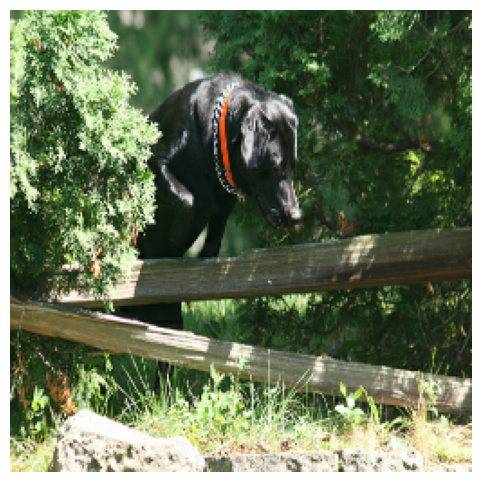

In [34]:
fig = plt.figure(figsize = (6,6))
for img,labels in images:
  plt.imshow(np.array(img)[0].astype('int'))
  plt.axis('off')

### Resnet152 Pretrained Model 

In [35]:
resnet_model = tf.keras.applications.resnet.ResNet152(
    include_top = False,
    input_shape = image_batch.shape[1:]
)

In [36]:
### preprocess image batch data
pre_processed_images = tf.keras.applications.resnet50.preprocess_input(
    x =  image_batch
)

In [37]:
image_features = resnet_model.predict(pre_processed_images)

2023-04-21 19:20:47.800041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 6s 963ms/step


### Transfer Learning
Attempt to use a feature extraction technique to reduce the overall dimensions (technique found on -> https://www.tensorflow.org/tutorials/images/transfer_learning)

**Freeze convoluational base** 

In [38]:
resnet_model.trainable = False

**Adding a 'classification head' to convert the multi-dimension matrix in to a single average vector**


This will help reduce the number of dimensions but kep the extracted features in some latent space.

In [39]:
image_features.shape

(100, 8, 8, 2048)

In [40]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
condensed_image_features = global_average_layer(image_features)
condensed_image_features.shape

TensorShape([100, 2048])

Each image now has a feature vector of approximatley ~2048 units and makes this method mouch more scalable instead of 190k+ units of features per image

### NLP

In [41]:
!pip install transformers

In [42]:
from transformers import pipeline, AutoTokenizer, AutoModel

/Users/kylelacson/anaconda3/envs/macGPU/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
feature_extraction = pipeline(task = 'feature-extraction', model = 'distilroberta-base', tokenizer = 'distilroberta-base')

Some layers from the model checkpoint at distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


### Distance Calculations

In [47]:
from scipy.spatial import distance ### package has multiple distance computations

In [48]:
### Euclidean Distance
def Euclidean_Distance(image,captions):
  img = np.array(image).flatten()
  cap = np.array(captions).flatten()
  return math.sqrt(sum(pow(a-b,2) for a, b in zip(img,cap)))

In [49]:
### Manhattan Distance
def Manhattan_Distance(image,captions):
  img = np.array(image).flatten()
  cap = np.array(captions).flatten()
  man_distance = sum(abs(a-b) for a,b in zip(img,cap))
  return man_distance

### Loading the captions

In [51]:
cap_json = glob.glob('**/captions.json', recursive = True)
caption_dir = os.path.abspath(cap_json[0])
caption_dir

'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/Python/Portfolio/Image_Caption_Classification/captions.json'

In [23]:
# if os.getcwd() == r'/Users/kylelacson/Library/Mobile Documents/com~apple~CloudDocs/Documents/Bay Path/ADS654Z1/Assignment_2':
#     caption_dir = os.path.join(dir_file,'captions.json')
#     print(r'PC/MAC initiated...')
# else:
#     caption_dir = r'/content/gdrive/MyDrive/School/ADS654Z1/captions.json'
#     print(r'Google Colab initiated...')

In [52]:
caption_json = open(caption_dir)

In [53]:
captions = json.load(caption_json)

In [54]:
captions = pd.Series(captions).map(lambda x: x.replace('<start>','').replace('<end>','').strip())

### RNN on text features

In [55]:
feature_captions_list = [] # feature vector for each captions 
for ix,i in enumerate(captions):
  features = feature_extraction(i)
  feature_captions_list.append(np.array(features))

**Calculate the largest tokenized matrix**

In [57]:
max_num = 0 
for i in feature_captions_list:
    if int(i.shape[1]) > max_num:
        max_num = int(i.shape[1])
    else:
        pass
max_num

28

**Matrix manipulation**

Goal here is to ensure that all the input from the tokenized feature matrix is the same shape. The mean was taken and the remaining number of rows were added with all values equal to the mean.

In [58]:
mean_feature_list = pd.Series(feature_captions_list).map(lambda x: np.mean(x))
reformed_captions_list = []
for ix,i in enumerate(feature_captions_list):
    if (i[0].shape[0]) < max_num:
        diff_rows = max_num - i[0].shape[0]
        cols = i[0].shape[1]
        additional_rows = np.array(np.ones((1,diff_rows,cols))) * mean_feature_list[ix]
        reformed_captions_list.append(np.concatenate([i,additional_rows], axis = 1))
    else:
        reformed_captions_list.append(feature_captions_list[ix])
reformed_captions_list = np.array(reformed_captions_list)

### Normalize my caption features

In [72]:
x_min = np.min(reformed_captions_list)
x_range = np.max(reformed_captions_list) - x_min

reformed_captions_list = reformed_captions_list - x_min
reformed_captions_list = reformed_captions_list / x_range

In [73]:
input_layer = tf.keras.Input(shape = reformed_captions_list[0].shape[1:], name = 'input_layer')
lstm_layer = tf.keras.layers.LSTM(units = 4196, activation = 'relu', name = 'lstm_layer')(input_layer)
output_layer = tf.keras.layers.Dense(units = np.array(condensed_image_features).shape[1], activation = 'relu', name = 'output_layer')(lstm_layer)


In [74]:
caption_feature_model = tf.keras.Model(inputs = input_layer, outputs = output_layer)
caption_feature_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 768)]         0         
                                                                 
 lstm_layer (LSTM)           (None, 4196)              83332560  
                                                                 
 output_layer (Dense)        (None, 2048)              8595456   
                                                                 
Total params: 91,928,016
Trainable params: 91,928,016
Non-trainable params: 0
_________________________________________________________________


In [75]:
caption_feature_model.compile(
    optimizer = 'adam',
    metrics = 'accuracy'
)

In [76]:
caption_feature_model.trainable = False

In [77]:
captions_features = caption_feature_model.predict(np.squeeze(reformed_captions_list))

2023-04-21 19:35:55.620600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 144ms/step


In [78]:
test_images = np.array(condensed_image_features) # test feature vectors for images
test_images.shape

(100, 2048)

# Note: You can comment these next two cells out

In [79]:
def json_image_caption_manhattan():
  json_temp_dict = {} # not sure if this is needed
  for ix,i in enumerate(test_images):
    distance_list = []
    for jx,j in enumerate(captions_features):
      distance = Manhattan_Distance(i,j)
      distance_list.append(distance)
    ### need to filter out the bottom 5 here and add to dictionary 
    json_temp_dict[ix+1] = list(pd.Series(distance_list).sort_values(ascending = False).index[:5].map(lambda x: captions[x]))
  return json_temp_dict

def json_image_caption_euclidean():
  json_temp_dict = {} 
  for ix,i in enumerate(test_images):
    distance_list = []
    for jx,j in enumerate(captions_features):
      distance = Euclidean_Distance(i,j)
      distance_list.append(distance)
    json_temp_dict[ix+1] = list(pd.Series(distance_list).sort_values(ascending = False).index[:5].map(lambda x: captions[x]))
  return json_temp_dict

json_temp_dict_manhattan = json_image_caption_manhattan()
json_temp_dict_euclidean = json_image_caption_euclidean()

In [80]:
def verify_integer():
    while True:
        dict_input = input('Please insert a number between 1-100: ')
        if dict_input.isdigit():
            if 1 <= int(dict_input) <= 100:
                return int(dict_input)
            else:
                continue
        
def json_image_finder_manhattan():
    dict_input = verify_integer()
    fig = plt.figure(figsize = (6,6))
    plt.imshow(np.array(image_batch[dict_input-1]).astype('int')) 
    plt.title(f'Image {dict_input}')
    for i in range(5):
        print(f'{json_temp_dict_manhattan[dict_input][i]}')


def json_image_finder_euclidean():
    dict_input = verify_integer()
    fig = plt.figure(figsize = (6,6))
    plt.imshow(np.array(image_batch[dict_input-1]).astype('int')) 
    plt.title(f'Image {dict_input}')
    for i in range(5):
        print(f'{json_temp_dict_euclidean[dict_input][i]}')

In [81]:
def man_or_euc(distance_formula : str = 'Euclidean' or 'Manhattan'):
    try:
        if distance_formula == 'Euclidean':
            json_image_finder_euclidean()
        elif distnce_formula == 'Manhattan':
            json_image_caption_manhattan()
    except NameError:
        print('Did not properly provide a correct parameter. Try again.')

A person in a cap with earflaps carries two grocery bags down a city street past a poster of a mustached man .
Four young children dressed formally pose for a potrait with the two boys standing in front and the two girls smiling in the back .
a man in a stripy hat is standing in a house built from ice that has a pair of boots in the doorway .
One dog is sniffing the ground by the wooden fence whist another dog is carrying a Frisbee in its mouth .
A dog pees on the side of a fountain , another dog sniffs the wall , and one is being walked .


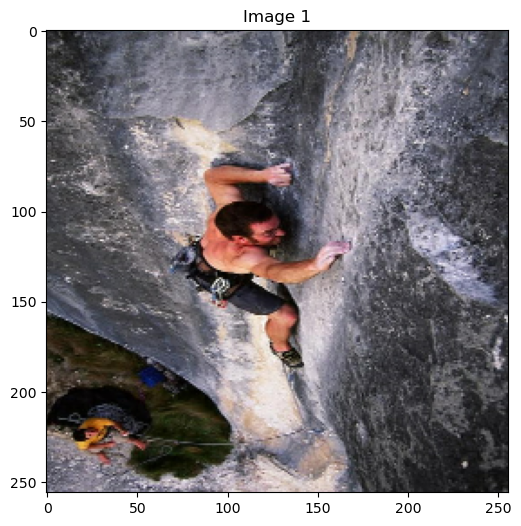

In [82]:
man_or_euc('Euclidean')

In [83]:
### test_images -> images : sel_images_labels
# feature_captions_list (captions_features) -> captions : captions

In [84]:
captions_features_copy = captions_features.copy()

In [85]:
json_images_caption = {}
caption_range = pd.Series([i for i in range(len(captions))]) # keeps track of the indexes
captions_features_copy = pd.DataFrame(captions_features_copy)
for ix,i in enumerate(test_images): # iterate through images
    captions_distances = []
    for jx,j in enumerate(captions_features_copy.values): # iterate through captions
        distance = Euclidean_Distance(i,j)
        captions_distances.append(distance) #calculate distances between each images and caption
        # print(distance,jx)
    remove_index = pd.Series(captions_distances).sort_values(ascending = True)[:5].index  # shortest distance between images and captions and then grabbing their indexes
    # print(remove_index)
    json_images_caption[ix+1] = remove_index
    for k in remove_index:
        # print(k)
        while k in caption_range:
            caption_range.drop(index = k, axis = 0, inplace = True) 
            captions_features_copy.iloc[k] = captions_features_copy.iloc[k].map(lambda x: 100) # set to 100 so that the distance formula does not pick this row up.
            # print(captions_test.iloc[k])
            

In [86]:
for i in json_images_caption.keys():
    json_images_caption[i] = json_images_caption[i].values

In [88]:
json_images_caption

{1: array([115,  25,  36, 307, 190]),
 2: array([254, 302, 271, 495, 333]),
 3: array([477, 424, 200, 400, 214]),
 4: array([171, 208, 180, 107, 415]),
 5: array([157, 414, 316, 204,  29]),
 6: array([313, 437, 392, 305, 146]),
 7: array([142, 322, 188, 265, 251]),
 8: array([452, 357, 193, 266, 497]),
 9: array([ 10, 303, 326, 343,  43]),
 10: array([109,   4, 308, 151, 184]),
 11: array([374, 132, 461, 370, 475]),
 12: array([ 80, 113, 353, 267, 250]),
 13: array([292, 393, 350, 463, 294]),
 14: array([197, 219,  24,  99, 408]),
 15: array([379, 486, 238,  68, 412]),
 16: array([ 98,  87, 139,  53, 248]),
 17: array([390,  49, 395,  56, 376]),
 18: array([161,  83, 396, 260, 397]),
 19: array([  1, 175, 261, 150, 124]),
 20: array([118, 112, 342, 255, 170]),
 21: array([225, 323, 153, 272,  47]),
 22: array([ 76, 416,  70, 231, 164]),
 23: array([ 57,  33, 469, 165, 409]),
 24: array([162, 241, 298, 205, 187]),
 25: array([102,  23, 121, 496,   7]),
 26: array([278,  13,  54,   3, 38

In [89]:
image_swap = {}
for ix,i in enumerate(label_batch):
    image_swap[i.numpy()] = json_images_caption[ix+1]

In [90]:
image_swap

{82: array([115,  25,  36, 307, 190]),
 39: array([254, 302, 271, 495, 333]),
 91: array([477, 424, 200, 400, 214]),
 50: array([171, 208, 180, 107, 415]),
 83: array([157, 414, 316, 204,  29]),
 92: array([313, 437, 392, 305, 146]),
 1: array([142, 322, 188, 265, 251]),
 80: array([452, 357, 193, 266, 497]),
 34: array([ 10, 303, 326, 343,  43]),
 4: array([109,   4, 308, 151, 184]),
 25: array([374, 132, 461, 370, 475]),
 70: array([ 80, 113, 353, 267, 250]),
 48: array([292, 393, 350, 463, 294]),
 23: array([197, 219,  24,  99, 408]),
 30: array([379, 486, 238,  68, 412]),
 40: array([ 98,  87, 139,  53, 248]),
 14: array([390,  49, 395,  56, 376]),
 93: array([161,  83, 396, 260, 397]),
 73: array([  1, 175, 261, 150, 124]),
 100: array([118, 112, 342, 255, 170]),
 97: array([225, 323, 153, 272,  47]),
 72: array([ 76, 416,  70, 231, 164]),
 60: array([ 57,  33, 469, 165, 409]),
 55: array([162, 241, 298, 205, 187]),
 78: array([102,  23, 121, 496,   7]),
 85: array([278,  13,  54,

In [91]:
image_swap_copy = image_swap.copy()

In [92]:
for ix,i in enumerate(image_swap_copy.keys()):
    image_swap_copy[i] = list(map(lambda x: captions[x], list(image_swap_copy[i])))

In [93]:
image_swap_copy

{82: ['Military personnel shoot rifles .',
  'Two girls riding an ATV .',
  'Two young girls drive an ATV .',
  'Two small white dogs playing',
  'A skier skiing downhill in a cloud of snow .'],
 39: ['A person in a cap with earflaps carries two grocery bags down a city street past a poster of a mustached man .',
  'A person is standing in the ocean fully clothed holding a fishing pole in one hand and a tackle box in the other .',
  'One dog is sniffing the ground by the wooden fence whist another dog is carrying a Frisbee in its mouth .',
  'A dog pees on the side of a fountain , another dog sniffs the wall , and one is being walked .',
  'Two little girls stand against a wall , one girl has a happy face and the other girl has a sad face .'],
 91: ['a snowboarder wearing red is descending a snow covered mountain .',
  'A person riding a sled down a snowy slope .',
  'Military personnel learning how to shoot their rifles .',
  'A man at a casino hugging two colorfully dressed show girl

In [94]:
final_dictionary = {}
for ix, i in enumerate(image_swap_copy.keys()):
    final_dictionary[sel_images_labels[i]] = image_swap_copy[i]

In [95]:
final_dictionary

{'3425918361_3b890d9575.jpg': ['Military personnel shoot rifles .',
  'Two girls riding an ATV .',
  'Two young girls drive an ATV .',
  'Two small white dogs playing',
  'A skier skiing downhill in a cloud of snow .'],
 '2275372714_017c269742.jpg': ['A person in a cap with earflaps carries two grocery bags down a city street past a poster of a mustached man .',
  'A person is standing in the ocean fully clothed holding a fishing pole in one hand and a tackle box in the other .',
  'One dog is sniffing the ground by the wooden fence whist another dog is carrying a Frisbee in its mouth .',
  'A dog pees on the side of a fountain , another dog sniffs the wall , and one is being walked .',
  'Two little girls stand against a wall , one girl has a happy face and the other girl has a sad face .'],
 '492341908_1ef53be265.jpg': ['a snowboarder wearing red is descending a snow covered mountain .',
  'A person riding a sled down a snowy slope .',
  'Military personnel learning how to shoot thei

In [69]:
import json 

In [71]:
save_file = open('assignment_2_ KL.json','w')
json.dump(final_dictionary,save_file,indent = 4)
save_file.close()